In [1]:
# --- Fire Incidents in City of Pittsburgh ---
# Dataset source: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02

import pandas as pd

# Load the dataset directly from the WPRDC link
url = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
fire_df = pd.read_csv(url)

# Display the first few rows
fire_df.head()


,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [6]:
# Get general statistics (for numeric columns)
fire_df.describe()


,_id,incident_type,alarms,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
count,10730.000000,10712.000000,10730.000000,10076.000000,9044.000000,8998.000000,9.597000e+03,9000.000000,8998.000000,8997.000000,9520.000000,9520.000000
mean,6012.966915,127.278006,0.589003,1615.132692,4.950243,15.984886,4.200326e+10,3.001556,15.984886,3.397132,40.442632,-79.967827
std,4497.237830,17.398760,0.657308,834.328567,2.680973,8.282778,2.191992e+05,1.485791,8.282778,1.622775,0.024649,0.050287
min,1.000000,100.000000,0.000000,103.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,40.332946,-80.170740
25%,2683.250000,113.000000,0.000000,1102.000000,3.000000,10.000000,4.200311e+10,2.000000,10.000000,2.000000,40.427223,-80.005174
50%,5365.500000,118.000000,1.000000,1517.000000,5.000000,15.000000,4.200319e+10,3.000000,15.000000,3.000000,40.446103,-79.976829
75%,8047.750000,142.000000,1.000000,2206.000000,7.000000,22.000000,4.200331e+10,4.000000,22.000000,5.000000,40.459484,-79.928924
max,22542.000000,173.000000,19.000000,4810.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,40.541060,-79.784074


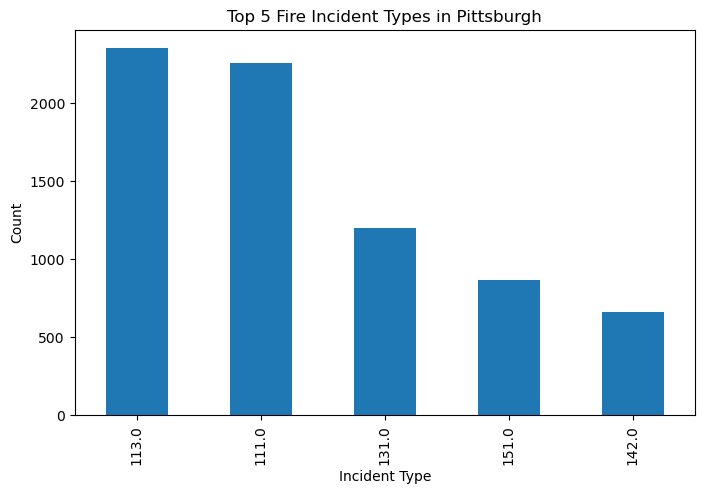

In [5]:
import matplotlib.pyplot as plt

# Top 5 most common incident types
top_types = fire_df['incident_type'].value_counts().head(5)
top_types.plot(kind='bar', title='Top 5 Fire Incident Types in Pittsburgh', figsize=(8,5))
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()


In [15]:
# --- Which neighborhood is the safest (fewest fire incidents)? ---

# Count number of incidents per neighborhood
neighborhood_counts = fire_df['neighborhood'].value_counts()

# Display the top and bottom neighborhoods
print("Top 10 neighborhoods with the MOST fire incidents:\n")
print(neighborhood_counts.head(100))

print("\nNeighborhoods with the FEWEST fire incidents:\n")
print(neighborhood_counts.tail(100))

# Safest neighborhood (fewest incidents)
safest_neighborhood = neighborhood_counts.idxmin()
print(f"\n✅ The safest neighborhood (fewest reported fire incidents) is: {safest_neighborhood}")


Top 10 neighborhoods with the MOST fire incidents:

neighborhood
Carrick                      328
South Side Flats             307
Central Business District    304
Squirrel Hill South          281
Hazelwood                    264
                            ... 
Ridgemont                     12
Mt. Oliver                    12
East Carnegie                 11
Regent Square                  9
Mount Oliver Borough           7
Name: count, Length: 91, dtype: int64

Neighborhoods with the FEWEST fire incidents:

neighborhood
Carrick                      328
South Side Flats             307
Central Business District    304
Squirrel Hill South          281
Hazelwood                    264
                            ... 
Ridgemont                     12
Mt. Oliver                    12
East Carnegie                 11
Regent Square                  9
Mount Oliver Borough           7
Name: count, Length: 91, dtype: int64

✅ The safest neighborhood (fewest reported fire incidents) is: Mount Ol

In [10]:
fire_df['neighborhood'].unique()

array([nan, 'Fineview', 'Fairywood', 'South Side Flats',
       'Allegheny Center', 'Lincoln-Lemington-Belmar', 'Carrick',
       'Beechview', 'Allentown', 'Beltzhoover', 'Crafton Heights',
       'Homewood North', 'Squirrel Hill South', 'Perry North',
       'Bedford Dwellings', 'Homewood South', 'East Allegheny',
       'Crawford-Roberts', 'Sheraden', 'Middle Hill', 'Strip District',
       'East Hills', 'Garfield', 'Greenfield', 'North Shore',
       'Spring Hill-City View', 'Central Business District', 'Upper Hill',
       'Manchester', 'Overbrook', 'Polish Hill', 'Central Lawrenceville',
       'Brookline', 'Marshall-Shadeland', 'North Oakland',
       'South Oakland', 'Homewood West', 'East Liberty', 'Hazelwood',
       'Squirrel Hill North', 'Friendship', 'West Oakland',
       'Terrace Village', 'Brighton Heights', 'Troy Hill', 'Windgap',
       'Knoxville', 'Upper Lawrenceville', 'Arlington', 'Elliott',
       'South Side Slopes', 'Bloomfield', 'Perry South',
       'Central N

In [17]:
# --- Rank all neighborhoods by number of fire incidents ---

# Count incidents per neighborhood
neighborhood_counts = fire_df['neighborhood'].value_counts()

# Display all neighborhoods ranked by total fire incidents
print("Neighborhoods ranked by number of fire incidents (most to least):\n")
for neighborhood, count in neighborhood_counts.items():
    print(f"{neighborhood}: {count} incidents")

# Show total number of neighborhoods
print(f"\nTotal neighborhoods listed: {len(neighborhood_counts)}")


Neighborhoods ranked by number of fire incidents (most to least):

Carrick: 328 incidents
South Side Flats: 307 incidents
Central Business District: 304 incidents
Squirrel Hill South: 281 incidents
Hazelwood: 264 incidents
Mount Washington: 238 incidents
East Liberty: 230 incidents
Brookline: 209 incidents
Homewood South: 209 incidents
Lincoln-Lemington-Belmar: 206 incidents
Knoxville: 205 incidents
Shadyside: 201 incidents
Homewood North: 197 incidents
Bloomfield: 191 incidents
Sheraden: 181 incidents
Perry South: 174 incidents
East Hills: 166 incidents
Beechview: 163 incidents
Brighton Heights: 163 incidents
Marshall-Shadeland: 162 incidents
Bluff: 159 incidents
Squirrel Hill North: 142 incidents
East Allegheny: 142 incidents
Beltzhoover: 141 incidents
Central Northside: 139 incidents
North Oakland: 136 incidents
Allentown: 136 incidents
Larimer: 130 incidents
Greenfield: 129 incidents
Garfield: 121 incidents
Spring Hill-City View: 119 incidents
Crawford-Roberts: 117 incidents
Perry 